# Notebook for ggplot2 visualizations 

In [4]:
library(ggplot2)
library(dplyr)
library(data.table)

# Scatter Plot 
## with smooth spline

`geom_smooth()` using method = 'loess'


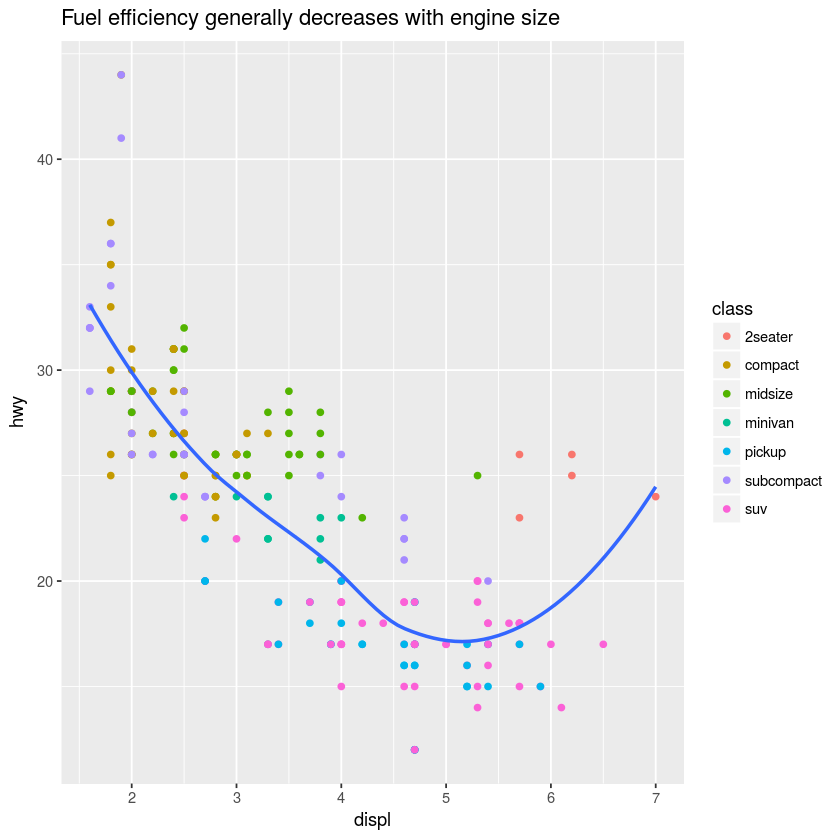

In [5]:
options(scipen=999)
library(ggplot2)
data("midwest", package = "ggplot2")
theme_set(theme_bw())

# Add plot components --------------------------------
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
  labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

# Call plot ------------------------------------------
plot(gg)ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(title = "Fuel efficiency generally decreases with engine size")

## scatter plot with size based on categorical data

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

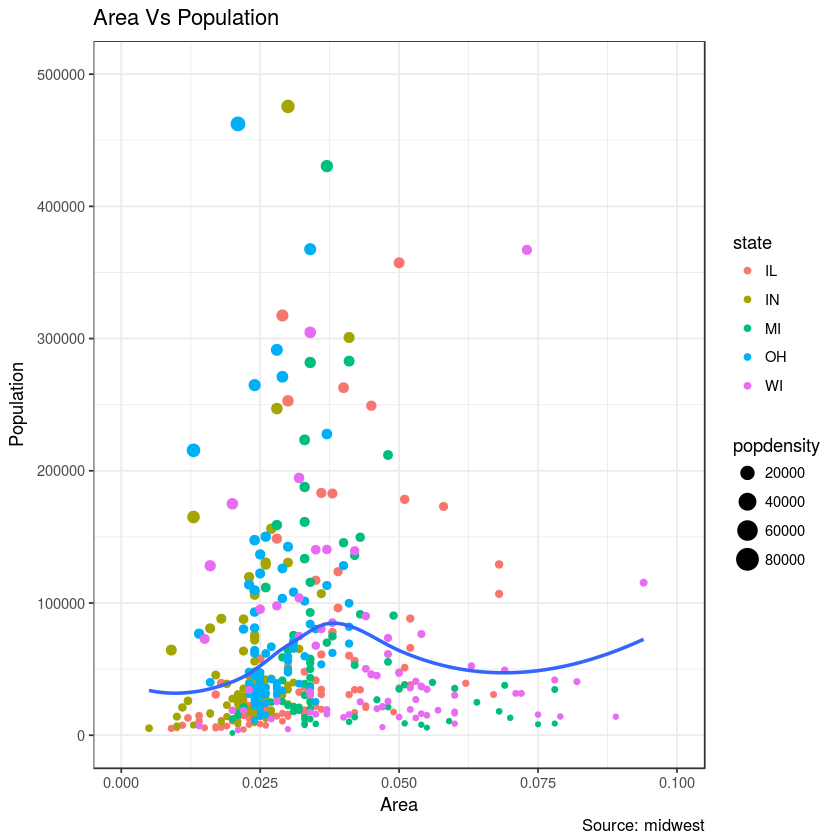

In [6]:
options(scipen=999)
library(ggplot2)
data("midwest", package = "ggplot2")
theme_set(theme_bw())

# Add plot components --------------------------------
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
  labs(title="Area Vs Population", y="Population", x="Area", caption="Source: midwest")

# Call plot ------------------------------------------
plot(gg)

# Multiple Faceting

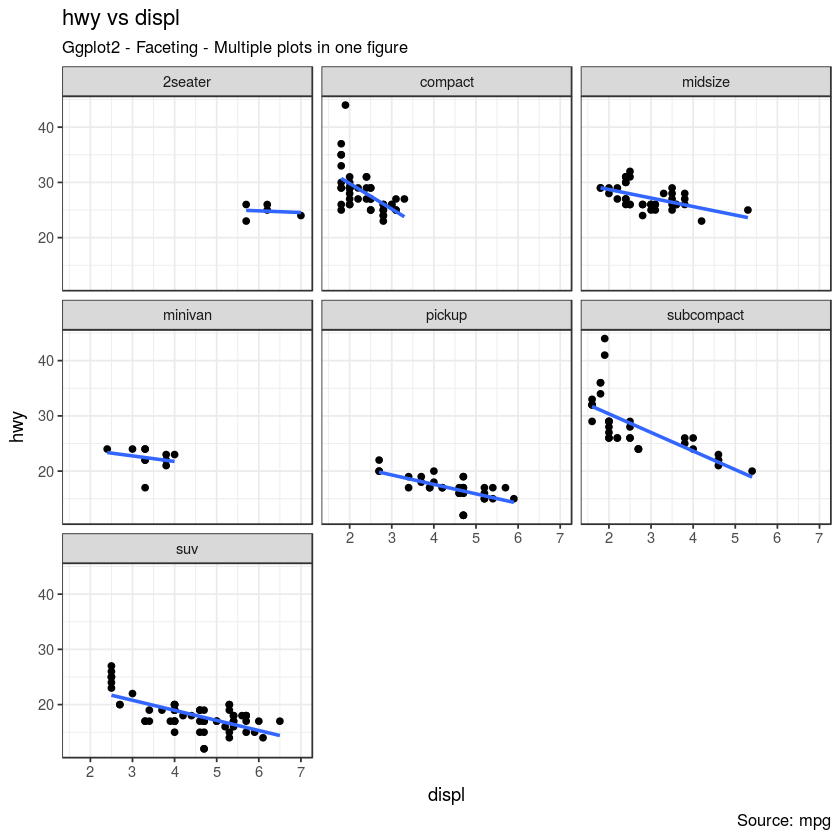

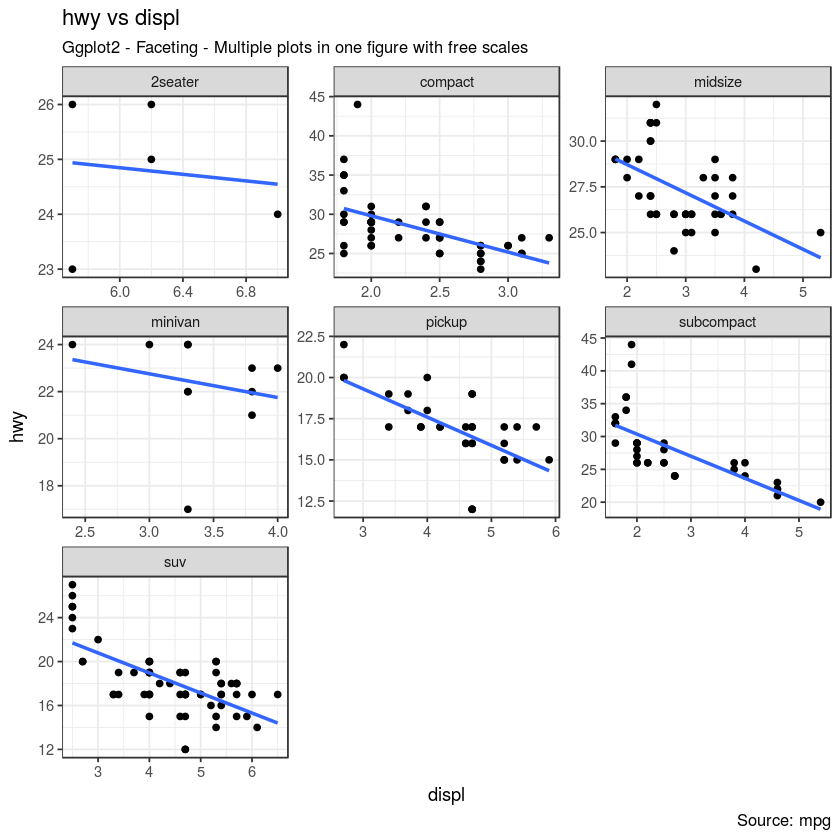

In [9]:
g <- ggplot(mpg, aes(x=displ, y=hwy)) + 
      geom_point() + 
      geom_smooth(method="lm", se=FALSE) + 
      theme_bw()  # apply bw theme

# Facet wrap with common scales
g + facet_wrap( ~ class, nrow=3) + 
                labs(title="hwy vs displ", 
                caption = "Source: mpg", 
                subtitle="Ggplot2 - Faceting - Multiple plots in one figure")  # Shared scales

# Facet wrap with free scales
g + facet_wrap( ~ class, scales = "free") + 
                labs(title="hwy vs displ",
                caption = "Source: mpg", 
                subtitle="Ggplot2 - Faceting - Multiple plots in one figure with free scales")  # Scales free


# Encircles

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

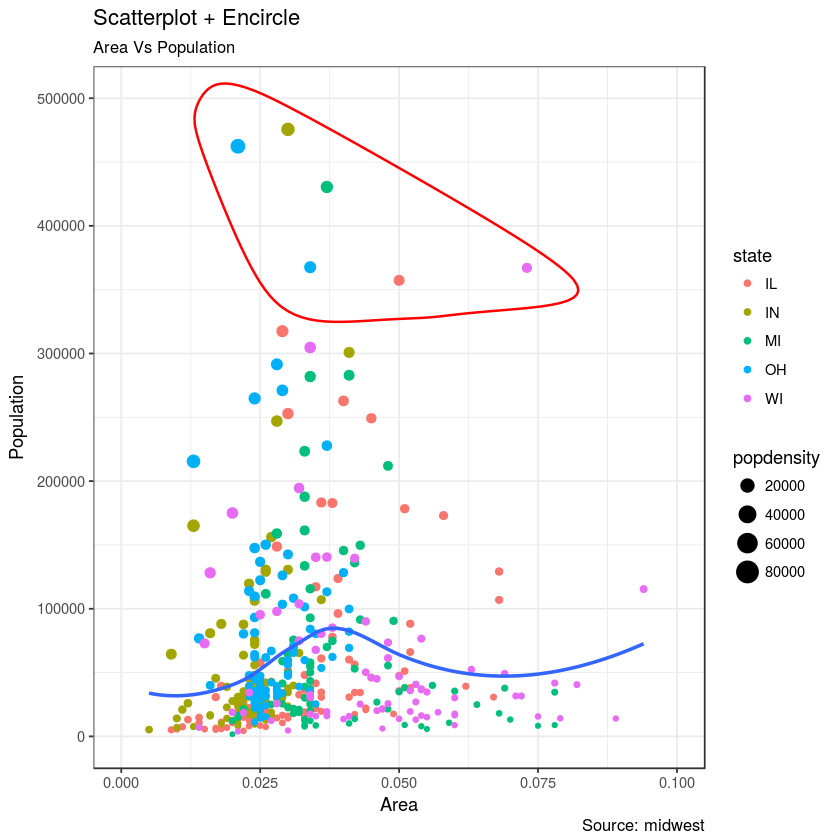

In [12]:
library(ggalt)
midwest_select <- midwest[midwest$poptotal > 350000 & 
                            midwest$poptotal <= 500000 & 
                            midwest$area > 0.01 & 
                            midwest$area < 0.1, ]

# Plot
ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) +   # draw points
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) +   # draw smoothing line
  geom_encircle(aes(x=area, y=poptotal), 
                data=midwest_select, 
                color="red", 
                size=2, 
                expand=0.08) +   # encircle
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot + Encircle", 
       caption="Source: midwest")

# Marginal Histogram / Boxplot

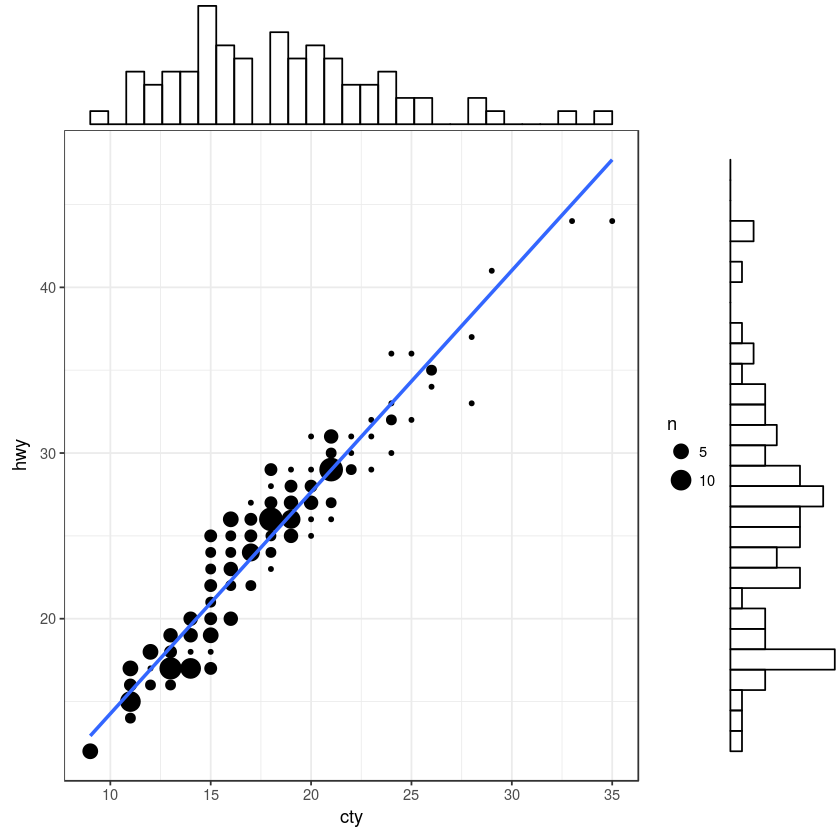

In [18]:
library(ggExtra)
data(mpg, package="ggplot2")
# mpg <- read.csv("http://goo.gl/uEeRGu")

# Scatterplot
theme_set(theme_bw())  # pre-set the bw theme.
mpg_select <- mpg[mpg$hwy >= 35 & mpg$cty > 27, ]
g <- ggplot(mpg, aes(cty, hwy)) + 
  geom_count() + 
  geom_smooth(method="lm", se=F)

 ggMarginal(g, type = "histogram", fill="transparent")
# ggMarginal(g, type = "boxplot", fill="transparent")
# ggMarginal(g, type = "density", fill="transparent")

# Correlogram

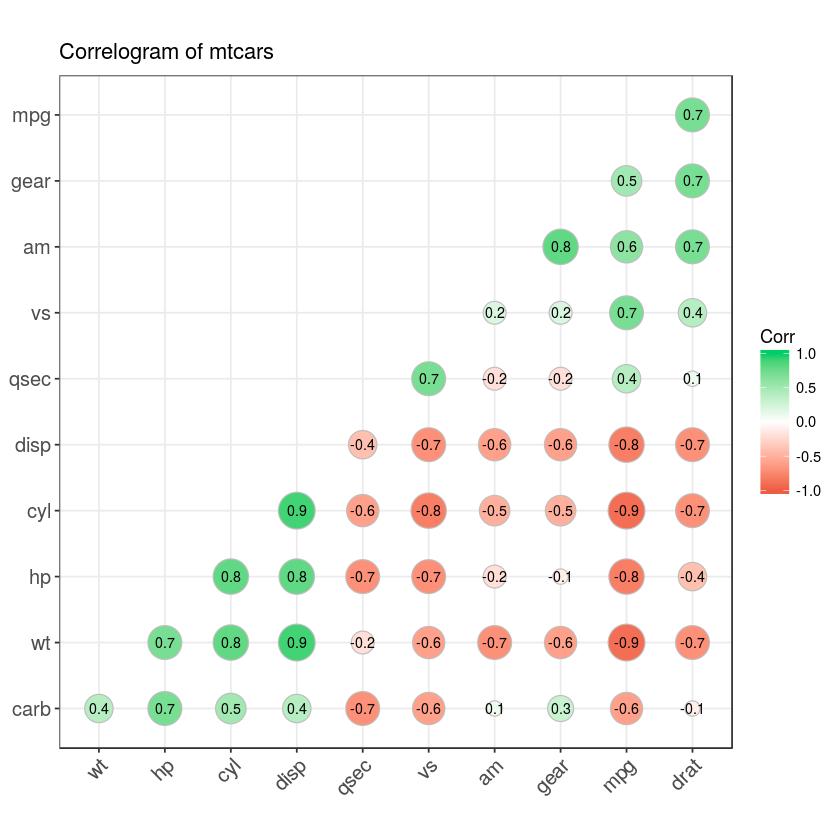

In [21]:
library(ggcorrplot)

# Correlation matrix
data(mtcars)
corr <- round(cor(mtcars), 1)

# Plot
ggcorrplot(corr, hc.order = TRUE, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 3, 
           method="circle", 
           colors = c("tomato2", "white", "springgreen3"), 
           title="Correlogram of mtcars", 
           ggtheme=theme_bw)

# Histograms


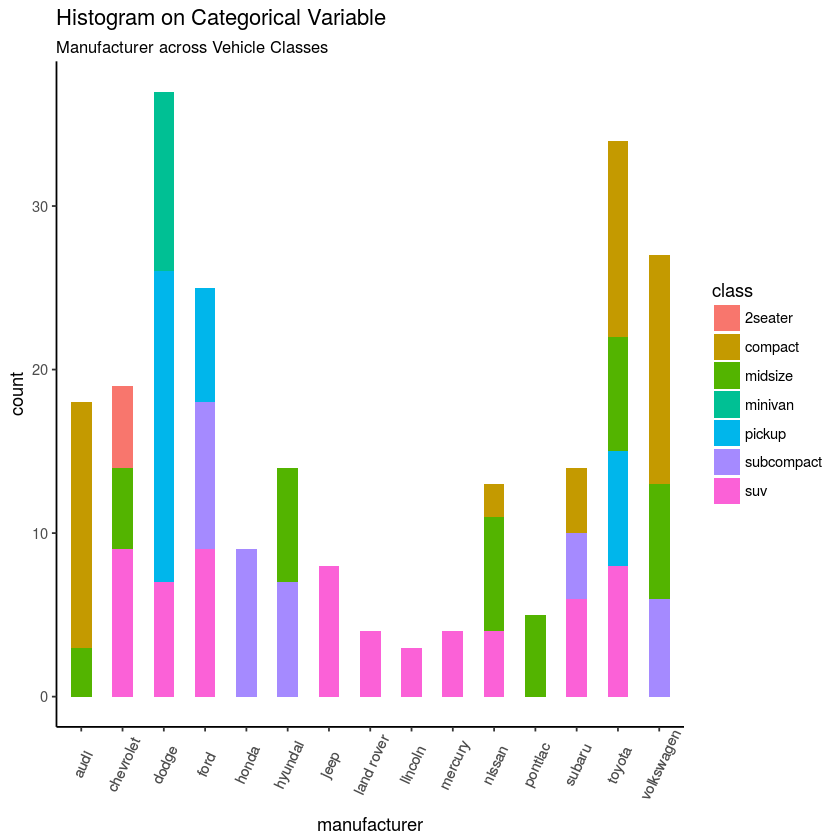

In [22]:
theme_set(theme_classic())

# Histogram on a Categorical variable
g <- ggplot(mpg, aes(manufacturer))
g + geom_bar(aes(fill=class), width = 0.5) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  labs(title="Histogram on Categorical Variable", 
       subtitle="Manufacturer across Vehicle Classes")

# Density 


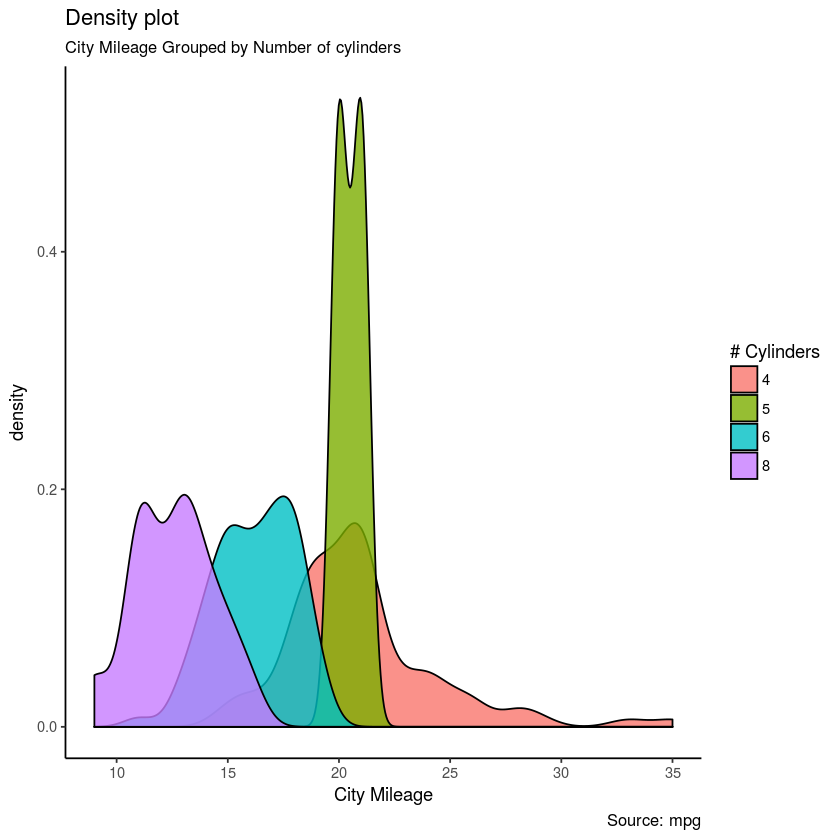

In [23]:
theme_set(theme_classic())

# Plot
g <- ggplot(mpg, aes(cty))
g + geom_density(aes(fill=factor(cyl)), alpha=0.8) + 
    labs(title="Density plot", 
         subtitle="City Mileage Grouped by Number of cylinders",
         caption="Source: mpg",
         x="City Mileage",
         fill="# Cylinders")

# BoxPlot

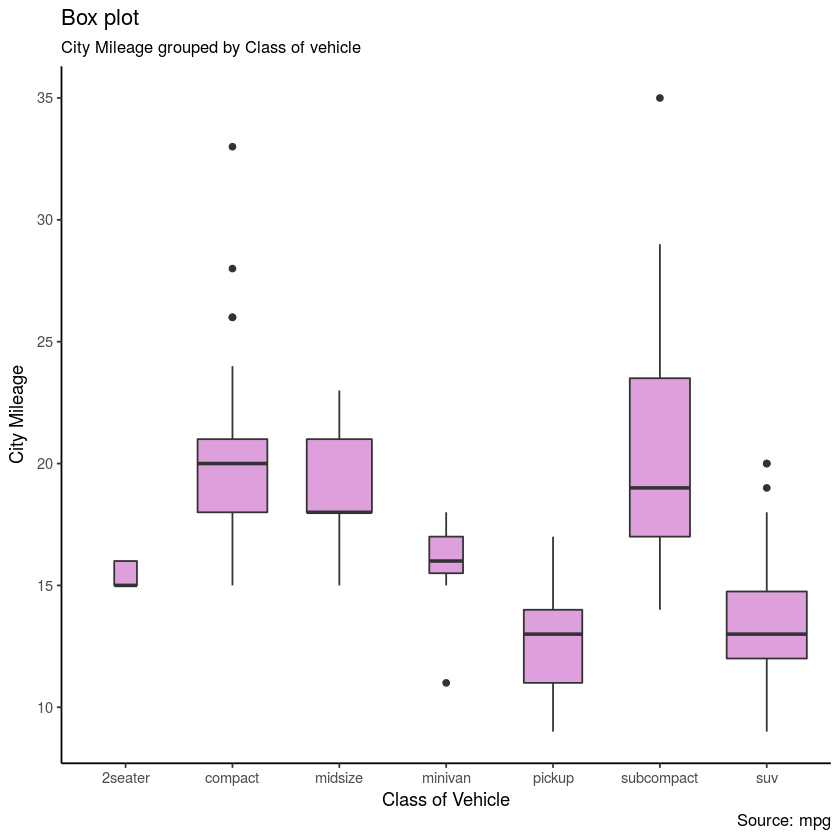

In [24]:
theme_set(theme_classic())

# Plot
g <- ggplot(mpg, aes(class, cty))
g + geom_boxplot(varwidth=T, fill="plum") + 
    labs(title="Box plot", 
         subtitle="City Mileage grouped by Class of vehicle",
         caption="Source: mpg",
         x="Class of Vehicle",
         y="City Mileage")

# PieChart

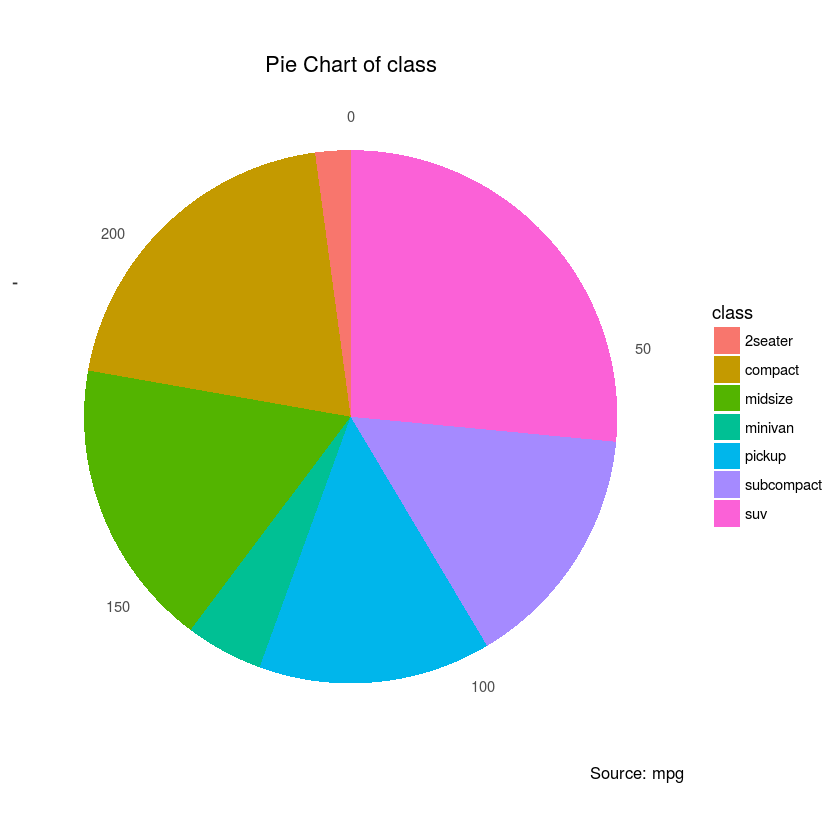

In [26]:
theme_set(theme_classic())

# Source: Frequency table
df <- as.data.frame(table(mpg$class))
colnames(df) <- c("class", "freq")
pie <- ggplot(df, aes(x = "", y=freq, fill = factor(class))) + 
  geom_bar(width = 1, stat = "identity") +
  theme(axis.line = element_blank(), 
        plot.title = element_text(hjust=0.5)) + 
  labs(fill="class", 
       x=NULL, 
       y=NULL, 
       title="Pie Chart of class", 
       caption="Source: mpg")

pie + coord_polar(theta = "y", start=0)
library(lubridate)
theme_set(theme_bw())

df <- economics_long[economics_long$variable %in% c("psavert", "uempmed"), ]
df <- df[lubridate::year(df$date) %in% c(1967:1981), ]

# labels and breaks for X axis text
brks <- df$date[seq(1, length(df$date), 12)]
lbls <- lubridate::year(brks)

# plot
ggplot(df, aes(x=date)) + 
  geom_line(aes(y=value, col=variable)) + 
  labs(title="Time Series of Returns Percentage", 
       subtitle="Drawn from Long Data format", 
       caption="Source: Economics", 
       y="Returns %", 
       color=NULL) +  # title and caption
  scale_x_date(labels = lbls, breaks = brks) +  # change to monthly ticks and labels
  scale_color_manual(labels = c("psavert", "uempmed"), 
                     values = c("psavert"="#00ba38", "uempmed"="#f8766d")) +  # line color
  theme(axis.text.x = element_text(angle = 90, vjust=0.5, size = 8),  # rotate x axis text
        panel.grid.minor = element_blank())  # turn off minor grid

# TimeSeries


Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date



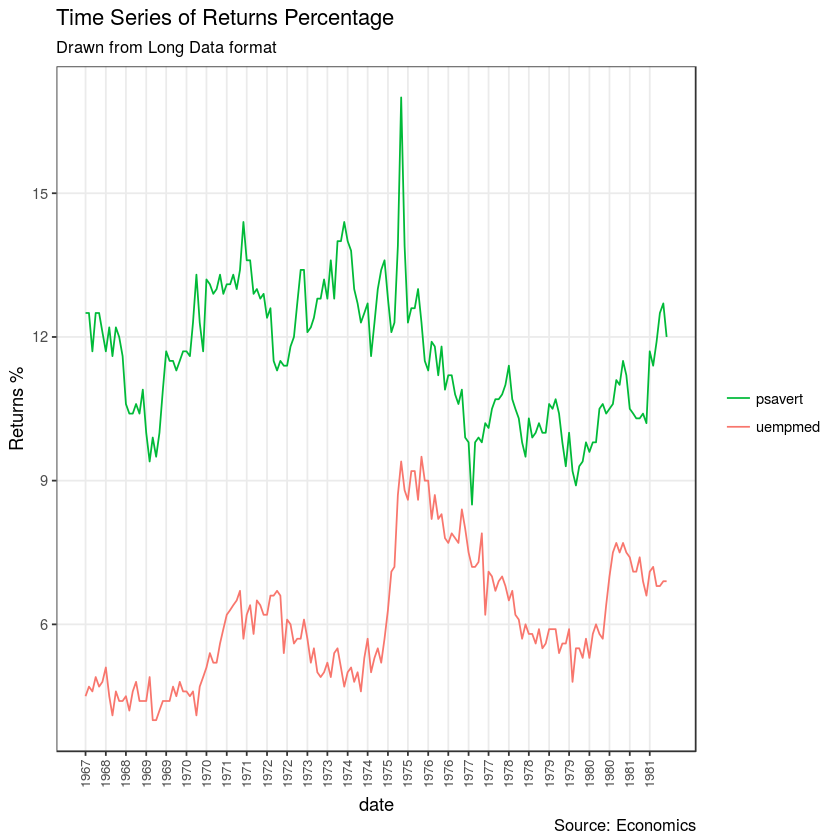

In [27]:
library(lubridate)
theme_set(theme_bw())

df <- economics_long[economics_long$variable %in% c("psavert", "uempmed"), ]
df <- df[lubridate::year(df$date) %in% c(1967:1981), ]

# labels and breaks for X axis text
brks <- df$date[seq(1, length(df$date), 12)]
lbls <- lubridate::year(brks)

# plot
ggplot(df, aes(x=date)) + 
  geom_line(aes(y=value, col=variable)) + 
  labs(title="Time Series of Returns Percentage", 
       subtitle="Drawn from Long Data format", 
       caption="Source: Economics", 
       y="Returns %", 
       color=NULL) +  # title and caption
  scale_x_date(labels = lbls, breaks = brks) +  # change to monthly ticks and labels
  scale_color_manual(labels = c("psavert", "uempmed"), 
                     values = c("psavert"="#00ba38", "uempmed"="#f8766d")) +  # line color
  theme(axis.text.x = element_text(angle = 90, vjust=0.5, size = 8),  # rotate x axis text
        panel.grid.minor = element_blank())  # turn off minor grid

# Clusters

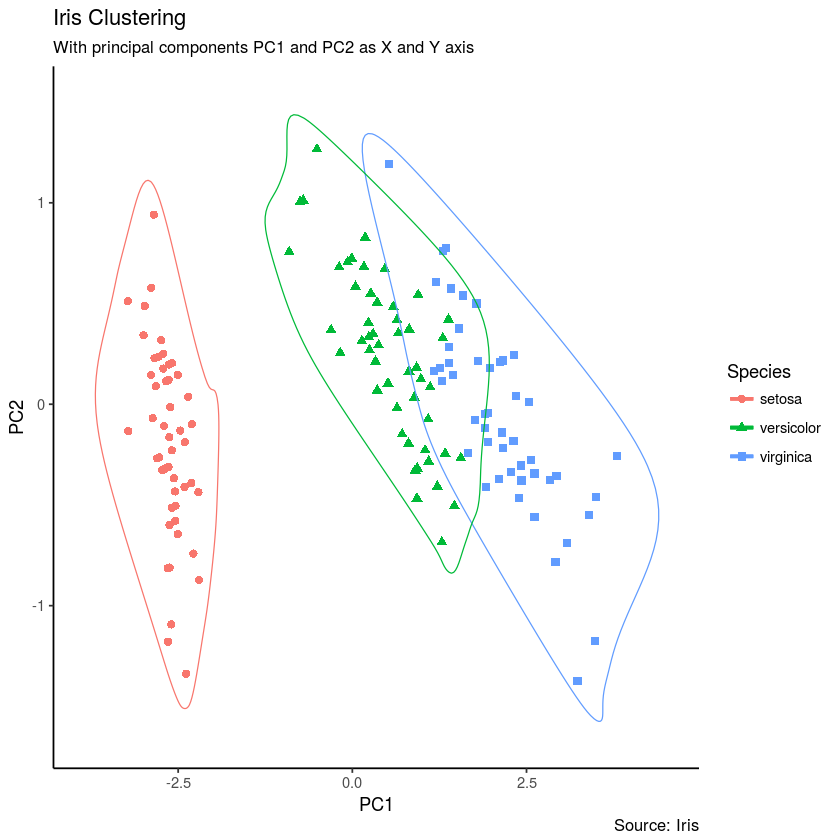

In [29]:
library(ggalt)
library(ggfortify)
theme_set(theme_classic())

# Compute data with principal components ------------------
df <- iris[c(1, 2, 3, 4)]
pca_mod <- prcomp(df)  # compute principal components

# Data frame of principal components ----------------------
df_pc <- data.frame(pca_mod$x, Species=iris$Species)  # dataframe of principal components
df_pc_vir <- df_pc[df_pc$Species == "virginica", ]  # df for 'virginica'
df_pc_set <- df_pc[df_pc$Species == "setosa", ]  # df for 'setosa'
df_pc_ver <- df_pc[df_pc$Species == "versicolor", ]  # df for 'versicolor'
 
# Plot ----------------------------------------------------
ggplot(df_pc, aes(PC1, PC2, col=Species)) + 
  geom_point(aes(shape=Species), size=2) +   # draw points
  labs(title="Iris Clustering", 
       subtitle="With principal components PC1 and PC2 as X and Y axis",
       caption="Source: Iris") + 
  coord_cartesian(xlim = 1.2 * c(min(df_pc$PC1), max(df_pc$PC1)), 
                  ylim = 1.2 * c(min(df_pc$PC2), max(df_pc$PC2))) +   # change axis limits
  geom_encircle(data = df_pc_vir, aes(x=PC1, y=PC2)) +   # draw circles
  geom_encircle(data = df_pc_set, aes(x=PC1, y=PC2)) + 
  geom_encircle(data = df_pc_ver, aes(x=PC1, y=PC2))